imports - numpy just to read data

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
from keras.models import Sequential

In [5]:
from keras.callbacks import EarlyStopping

parameter 'patience' is the number of epochs to proceed without improvement

In [25]:
early_stopping_monitor = EarlyStopping(patience=3)

read the data so we can find the number of nodes in the input layer (n_cols)

In [7]:
data_file = 'hourly_wages.csv'

use pandas to examine the file since we had a problem loading into numpy

In [8]:
df = pd.read_csv(data_file)

first row was a text headers which numpy could not handle. 
had to add "skiprows=1" parameter to get the loadtxt method to work

In [ ]:
predictors = np.loadtxt(data_file, delimiter=',', skiprows=1)

In [ ]:
df.info()

In [9]:
predictors = df.drop(['wage_per_hour'], axis=1)

In [38]:
from sklearn.preprocessing import Normalizer

In [10]:
import matplotlib.pyplot as plt

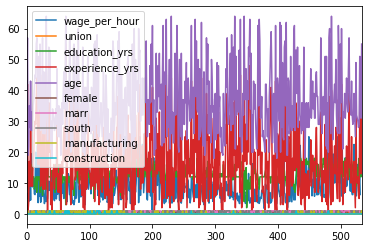

In [11]:
df.plot()

In [34]:
df20 = df.head(20)

In [39]:
target = df.wage_per_hour

In [41]:
transformer = Normalizer().fit(df)

In [46]:
df_norm = transformer.transform(df)

In [50]:
df_norm[0:1]

array([[0.12160069, 0.        , 0.19074617, 0.5007087 , 0.83451451,
        0.02384327, 0.02384327, 0.        , 0.02384327, 0.        ]])

In [51]:
df_my = pd.DataFrame(df_norm)

In [61]:
target2 = df_my

In [55]:
df_my.columns

RangeIndex(start=0, stop=10, step=1)

In [69]:
target2([1:],[1:])

SyntaxError: invalid syntax (<ipython-input-69-f1355d77a2e7>, line 1)

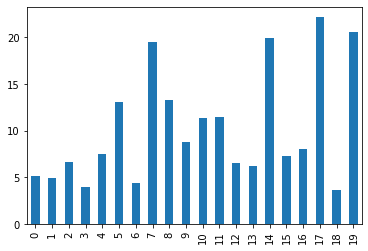

In [35]:
df20['wage_per_hour'].plot(kind='bar')

In [15]:
target.mean()

9.024063670411985

In [16]:
target.std()

5.139096854140682

In [ ]:
target

In [ ]:
df.head()

In [17]:
n_cols = predictors.shape[1]

In [18]:
n_cols

9

Sequential model - each layer connected only to the previous layer

In [19]:
model = Sequential()

build up model layer at a time - 'Dense' layers are fully connected

In [20]:
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
model.add(Dense(100, activation='relu'))

In [22]:
model.add(Dense(1))

dump out the model configuration

In [ ]:
model.get_config()

'adam' is a good, general purpose optimizer that adjusts the learning rate as it goes

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

need to split out the target column from the data

In [27]:
model.fit(predictors, target, validation_split=0.3, epochs=20)

Train on 373 samples, validate on 161 samples
Epoch 1/20
373/373 [==============================] - 0s 102us/step - loss: 18.9869 - acc: 0.0402 - val_loss: 24.9838 - val_acc: 0.0124
Epoch 2/20
373/373 [==============================] - 0s 154us/step - loss: 18.9910 - acc: 0.0349 - val_loss: 25.0560 - val_acc: 0.0186
Epoch 3/20
373/373 [==============================] - 0s 202us/step - loss: 18.9432 - acc: 0.0349 - val_loss: 24.9663 - val_acc: 0.0248
Epoch 4/20
373/373 [==============================] - 0s 231us/step - loss: 18.8711 - acc: 0.0429 - val_loss: 25.7195 - val_acc: 0.0248
Epoch 5/20
373/373 [==============================] - 0s 348us/step - loss: 18.4904 - acc: 0.0295 - val_loss: 26.7109 - val_acc: 0.0373
Epoch 6/20
373/373 [==============================] - 0s 165us/step - loss: 18.6571 - acc: 0.0456 - val_loss: 24.3881 - val_acc: 0.0186
Epoch 7/20
373/373 [==============================] - 0s 147us/step - loss: 18.3394 - acc: 0.0268 - val_loss: 25.1757 - val_acc: 0.0186
Ep

In [26]:
model.fit(predictors, target, validation_split=0.3, epochs=20, 
          callbacks = [early_stopping_monitor])

Train on 373 samples, validate on 161 samples
Epoch 1/20
373/373 [==============================] - 0s 101us/step - loss: 19.2925 - acc: 0.0322 - val_loss: 24.8486 - val_acc: 0.0124
Epoch 2/20
373/373 [==============================] - 0s 182us/step - loss: 19.3011 - acc: 0.0375 - val_loss: 25.0937 - val_acc: 0.0311
Epoch 3/20
373/373 [==============================] - 0s 100us/step - loss: 19.1424 - acc: 0.0322 - val_loss: 25.3870 - val_acc: 0.0311
Epoch 4/20
373/373 [==============================] - 0s 117us/step - loss: 19.5376 - acc: 0.0322 - val_loss: 26.4143 - val_acc: 0.0311


this model is not doing very well. Maybe need to look at scaling the data. 
Find the mean of each feature and divide by standard deviation.

In [ ]:
from keras.models import load_model

In [ ]:
model.save('model_file.h5')

In [ ]:
my_model = load_model('model_file.h5')